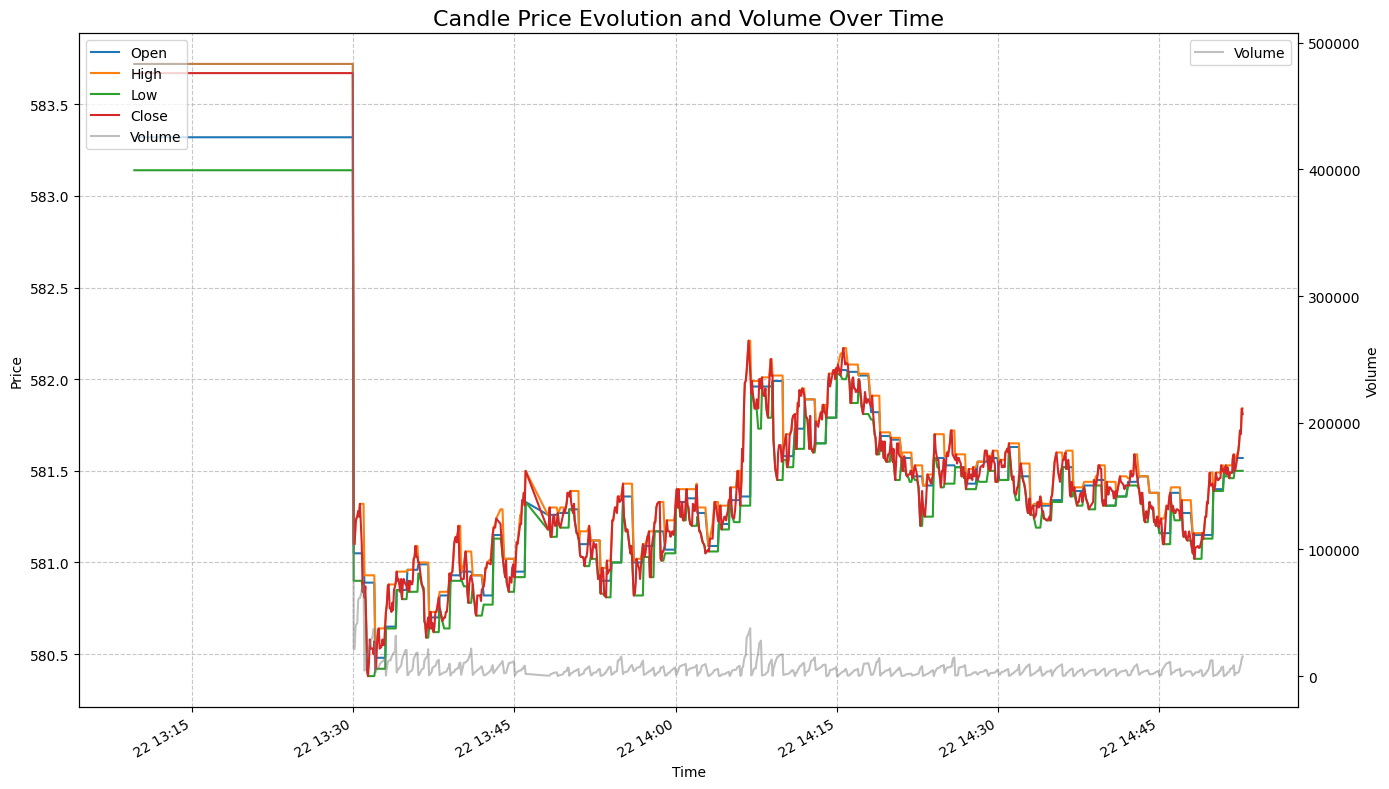

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Define column names
columns = ['now', 'candle_start', 'candle_end', 'candle_age', 'candle_remaining', 'open', 'high', 'low', 'close', 'volume']

# Load the CSV file
df = pd.read_csv('../output/2024-10-22-AMEX:SPY-regular-1-candle.csv', header=None, names=columns)

# Convert 'now' and 'candle_start' columns to datetime
df['now'] = pd.to_datetime(df['now'], unit='s')

# Trim records before market open (9:30 AM ET) and after market close (4:00 PM ET)
df['now_et'] = df['now'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
market_open = df['now_et'].dt.normalize() + pd.Timedelta(hours=9, minutes=30)
market_close = df['now_et'].dt.normalize() + pd.Timedelta(hours=16)
df = df[(df['now_et'] >= market_open) & (df['now_et'] <= market_close)]
df = df.drop(columns=['now_et'])

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot price data on primary axis
sns.lineplot(x=df['now'], y=df['open'], label='Open', ax=ax1)
sns.lineplot(x=df['now'], y=df['high'], label='High', ax=ax1)
sns.lineplot(x=df['now'], y=df['low'], label='Low', ax=ax1)
sns.lineplot(x=df['now'], y=df['close'], label='Close', ax=ax1)

ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')

# Create secondary axis for volume
ax2 = ax1.twinx()

# Plot volume on secondary axis
sns.lineplot(x=df['now'], y=df['volume'], label='Volume', ax=ax2, color='gray', alpha=0.5)

ax2.set_ylabel('Volume')
ax2.tick_params(axis='y')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Candle Price Evolution and Volume Over Time', fontsize=16)

# Improve x-axis readability
plt.gcf().autofmt_xdate()  # Rotation and alignment of tick labels

# Add grid for better readability
ax1.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()